# Top Earners in Movie Industry

## Table of Contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id="#intro"></a>
## Introduction

> This analysis project is to be done using the imdb movie data. When the analysis is completed, you should be able to find the top 5 highest grossing directors, the top 5 highest grossing movie genres of all time, comparing the revenue of the highest grossing movies and which companies released the most movies. 

> There are 10 columns that will not be needed for the analysis. Use pandas to drop these columns. HINT: Only the columns pertaining to revenue will be needed.

> To get you started, I've already placed the needed code for getting the packages and datafile that you will be using for the project. 

In [127]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv('imdb-movies.csv')

In [129]:
df.head(1)

id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810  Jurassic World   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                        homepage         director            tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow  The park is open.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  

[1 rows x 21 columns]

### Drop columns without neccesary information and remove all records with no financial information -- Pay close attention to things that don't tell you anything regarding financial data

In [130]:
# dropping columns that I don't need
df.drop(['id','imdb_id','runtime', 'budget_adj','budget','revenue', 'cast', 'homepage', 'release_date', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)
df.columns

Index(['popularity', 'original_title', 'director', 'genres',
       'production_companies', 'vote_count', 'vote_average', 'release_year',
       'revenue_adj'],
      dtype='object')

In [131]:
#changing index
df.index = np.arange(1, len(df) + 1)

In [132]:
#float with 2 digits
pd.options.display.float_format = "{:,.2f}".format

In [133]:
df.head(3)

popularity      original_title          director  \
1       32.99      Jurassic World   Colin Trevorrow   
2       28.42  Mad Max: Fury Road     George Miller   
3       13.11           Insurgent  Robert Schwentke   

                                      genres  \
1  Action|Adventure|Science Fiction|Thriller   
2  Action|Adventure|Science Fiction|Thriller   
3         Adventure|Science Fiction|Thriller   

                                production_companies  vote_count  \
1  Universal Studios|Amblin Entertainment|Legenda...        5562   
2  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
3  Summit Entertainment|Mandeville Films|Red Wago...        2480   

   vote_average  release_year      revenue_adj  
1          6.50          2015 1,392,445,892.52  
2          7.10          2015   348,161,292.49  
3          6.30          2015   271,619,025.41

In [134]:
df.tail(3)

popularity            original_title          director          genres  \
10864        0.07       Beregis Avtomobilya    Eldar Ryazanov  Mystery|Comedy   
10865        0.06    What's Up, Tiger Lily?       Woody Allen   Action|Comedy   
10866        0.04  Manos: The Hands of Fate  Harold P. Warren          Horror   

          production_companies  vote_count  vote_average  release_year  \
10864                  Mosfilm          11          6.50          1966   
10865  Benedict Pictures Corp.          22          5.40          1966   
10866                Norm-Iris          15          1.50          1966   

       revenue_adj  
10864         0.00  
10865         0.00  
10866         0.00

In [135]:
# checking for duplicates
df.duplicated().sum()

1

In [136]:
#dropping duplicates
df.drop_duplicates(subset=None, keep='first', inplace=False)

popularity                original_title            director  \
1           32.99                Jurassic World     Colin Trevorrow   
2           28.42            Mad Max: Fury Road       George Miller   
3           13.11                     Insurgent    Robert Schwentke   
4           11.17  Star Wars: The Force Awakens         J.J. Abrams   
5            9.34                     Furious 7           James Wan   
...           ...                           ...                 ...   
10862        0.08            The Endless Summer         Bruce Brown   
10863        0.07                    Grand Prix  John Frankenheimer   
10864        0.07           Beregis Avtomobilya      Eldar Ryazanov   
10865        0.06        What's Up, Tiger Lily?         Woody Allen   
10866        0.04      Manos: The Hands of Fate    Harold P. Warren   

                                          genres  \
1      Action|Adventure|Science Fiction|Thriller   
2      Action|Adventure|Science Fiction|Thriller   
3             Adventure|Science Fiction|Thriller   
4       Action|Adventure|Science Fiction|Fantasy   
5                          Action|Crime|Thriller   
...                                          ...   
10862                                Documentary   
10863                     Action|Adventure|Drama   
10864                             Mystery|Comedy   
10865                              Action|Comedy   
10866                                     Horror   

                                    production_companies  vote_count  \
1      Universal Studios|Amblin Entertainment|Legenda...        5562   
2      Village Roadshow Pictures|Kennedy Miller Produ...        6185   
3      Summit Entertainment|Mandeville Films|Red Wago...        2480   
4              Lucasfilm|Truenorth Productions|Bad Robot        5292   
5      Universal Pictures|Original Film|Media Rights ...        2947   
...                                                  ...         ...   
10862                                  Bruce Brown Films          11   
10863  Cherokee Productions|Joel Productions|Douglas ...          20   
10864                                            Mosfilm          11   
10865                            Benedict Pictures Corp.          22   
10866                                          Norm-Iris          15   

       vote_average  release_year      revenue_adj  
1              6.50          2015 1,392,445,892.52  
2              7.10          2015   348,161,292.49  
3              6.30          2015   271,619,025.41  
4              7.50          2015 1,902,723,129.80  
5              7.30          2015 1,385,748,801.47  
...             ...           ...              ...  
10862          7.40          1966             0.00  
10863          5.70          1966             0.00  
10864          6.50          1966             0.00  
10865          5.40          1966             0.00  
10866          1.50          1966             0.00  

[10865 rows x 9 columns]

In [137]:
# Delete all records with null, or empty values
# replacing 0.00 values with NaN
df= df.replace (0.00, np.nan)

In [138]:
df.tail(3)

popularity            original_title          director          genres  \
10864        0.07       Beregis Avtomobilya    Eldar Ryazanov  Mystery|Comedy   
10865        0.06    What's Up, Tiger Lily?       Woody Allen   Action|Comedy   
10866        0.04  Manos: The Hands of Fate  Harold P. Warren          Horror   

          production_companies  vote_count  vote_average  release_year  \
10864                  Mosfilm          11          6.50          1966   
10865  Benedict Pictures Corp.          22          5.40          1966   
10866                Norm-Iris          15          1.50          1966   

       revenue_adj  
10864          NaN  
10865          NaN  
10866          NaN

In [139]:
# deleting values with NaN
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [140]:
# check for the result
df.tail(3)

popularity    original_title           director  \
10830        0.40         El Dorado       Howard Hawks   
10836        0.30  The Sand Pebbles        Robert Wise   
10849        0.21  Fantastic Voyage  Richard Fleischer   

                                   genres  \
10830                      Action|Western   
10836  Action|Adventure|Drama|War|Romance   
10849           Adventure|Science Fiction   

                                    production_companies  vote_count  \
10830              Paramount Pictures|Laurel Productions          36   
10836  Twentieth Century Fox Film Corporation|Solar P...          28   
10849             Twentieth Century Fox Film Corporation          42   

       vote_average  release_year    revenue_adj  
10830          6.90          1966  40,308,088.15  
10836          7.00          1966 134,360,293.85  
10849          6.70          1966  80,616,176.31

In [141]:
# resetting indexes, so that data have correct numbers
df.reset_index(drop=True, inplace=True)

In [142]:
#checking the result
df.tail(3)

popularity    original_title           director  \
4750        0.40         El Dorado       Howard Hawks   
4751        0.30  The Sand Pebbles        Robert Wise   
4752        0.21  Fantastic Voyage  Richard Fleischer   

                                  genres  \
4750                      Action|Western   
4751  Action|Adventure|Drama|War|Romance   
4752           Adventure|Science Fiction   

                                   production_companies  vote_count  \
4750              Paramount Pictures|Laurel Productions          36   
4751  Twentieth Century Fox Film Corporation|Solar P...          28   
4752             Twentieth Century Fox Film Corporation          42   

      vote_average  release_year    revenue_adj  
4750          6.90          1966  40,308,088.15  
4751          7.00          1966 134,360,293.85  
4752          6.70          1966  80,616,176.31

In [143]:
# saving decently cleaned data
df.to_csv('imdb-movies_01.csv',index = False)
df=pd.read_csv('imdb-movies_01.csv')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4753 entries, 0 to 4752
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            4753 non-null   float64
 1   original_title        4753 non-null   object 
 2   director              4753 non-null   object 
 3   genres                4753 non-null   object 
 4   production_companies  4753 non-null   object 
 5   vote_count            4753 non-null   int64  
 6   vote_average          4753 non-null   float64
 7   release_year          4753 non-null   int64  
 8   revenue_adj           4753 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 334.3+ KB


In [145]:
df.index = np.arange(1, len(df) + 1)

In [146]:
df.head(3)

popularity      original_title          director  \
1       32.99      Jurassic World   Colin Trevorrow   
2       28.42  Mad Max: Fury Road     George Miller   
3       13.11           Insurgent  Robert Schwentke   

                                      genres  \
1  Action|Adventure|Science Fiction|Thriller   
2  Action|Adventure|Science Fiction|Thriller   
3         Adventure|Science Fiction|Thriller   

                                production_companies  vote_count  \
1  Universal Studios|Amblin Entertainment|Legenda...        5562   
2  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
3  Summit Entertainment|Mandeville Films|Red Wago...        2480   

   vote_average  release_year      revenue_adj  
1          6.50          2015 1,392,445,892.52  
2          7.10          2015   348,161,292.49  
3          6.30          2015   271,619,025.41

In [147]:
df.tail(3)

popularity    original_title           director  \
4751        0.40         El Dorado       Howard Hawks   
4752        0.30  The Sand Pebbles        Robert Wise   
4753        0.21  Fantastic Voyage  Richard Fleischer   

                                  genres  \
4751                      Action|Western   
4752  Action|Adventure|Drama|War|Romance   
4753           Adventure|Science Fiction   

                                   production_companies  vote_count  \
4751              Paramount Pictures|Laurel Productions          36   
4752  Twentieth Century Fox Film Corporation|Solar P...          28   
4753             Twentieth Century Fox Film Corporation          42   

      vote_average  release_year    revenue_adj  
4751          6.90          1966  40,308,088.15  
4752          7.00          1966 134,360,293.85  
4753          6.70          1966  80,616,176.31

### Data Cleaning

In [148]:
#saving kind of clean data
df.to_csv('imdb-movies_02.csv',index = False)
df = pd.read_csv('imdb-movies_02.csv')

In [149]:
df.index = np.arange(1, len(df) + 1)

In [150]:
df.head(3)

popularity      original_title          director  \
1       32.99      Jurassic World   Colin Trevorrow   
2       28.42  Mad Max: Fury Road     George Miller   
3       13.11           Insurgent  Robert Schwentke   

                                      genres  \
1  Action|Adventure|Science Fiction|Thriller   
2  Action|Adventure|Science Fiction|Thriller   
3         Adventure|Science Fiction|Thriller   

                                production_companies  vote_count  \
1  Universal Studios|Amblin Entertainment|Legenda...        5562   
2  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
3  Summit Entertainment|Mandeville Films|Red Wago...        2480   

   vote_average  release_year      revenue_adj  
1          6.50          2015 1,392,445,892.52  
2          7.10          2015   348,161,292.49  
3          6.30          2015   271,619,025.41

In [151]:
df.tail(3)

popularity    original_title           director  \
4751        0.40         El Dorado       Howard Hawks   
4752        0.30  The Sand Pebbles        Robert Wise   
4753        0.21  Fantastic Voyage  Richard Fleischer   

                                  genres  \
4751                      Action|Western   
4752  Action|Adventure|Drama|War|Romance   
4753           Adventure|Science Fiction   

                                   production_companies  vote_count  \
4751              Paramount Pictures|Laurel Productions          36   
4752  Twentieth Century Fox Film Corporation|Solar P...          28   
4753             Twentieth Century Fox Film Corporation          42   

      vote_average  release_year    revenue_adj  
4751          6.90          1966  40,308,088.15  
4752          7.00          1966 134,360,293.85  
4753          6.70          1966  80,616,176.31

#### Here's a helpful hint from my own analysis when I ran this the first time. This may help shed light on what your data set should look like.

#### If I created one record for each the `production_companies` a movie was release under and one record each for `genres`<br>and tried to run calculations, it wouldn't work because for many records, the amount of `production_companies`<br>and `genres` aren't the same, so I'll create 2 dataframes; one w/o a `production_companies` column and one w/o a `genres` columns

In [152]:
# Note: I would probably create another dataframe for directors as well, since some names have bar separator as well. 
# Since this is my first project, I don't want to get too commlicated
df.director.value_counts()

Steven Spielberg                27
Clint Eastwood                  26
Woody Allen                     22
Ridley Scott                    22
Martin Scorsese                 18
                                ..
Kevin Macdonald|Zillah Bowes     1
Terence Davies                   1
Evan Glodell                     1
David Lickley                    1
Howard Hawks                     1
Name: director, Length: 2084, dtype: int64

In [153]:
#CREATING DATAFRRAME W/O PRODUCTION_COMPANIES

In [154]:
#check if there are any null records
df.isnull().sum()

popularity              0
original_title          0
director                0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
revenue_adj             0
dtype: int64

In [155]:
#check if there are any NaN records
df.isna().sum()

popularity              0
original_title          0
director                0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
revenue_adj             0
dtype: int64

In [156]:
df.isna().values.any()

False

In [253]:
df.release_year.value_counts(ascending = False).head(10)

2013    236
2011    235
2014    227
2010    213
2015    213
2012    209
2006    202
2008    198
2009    194
2007    187
Name: release_year, dtype: int64

In [158]:
df.production_companies.value_counts()

Paramount Pictures                                                                  107
Universal Pictures                                                                   78
Columbia Pictures                                                                    51
Warner Bros.                                                                         48
New Line Cinema                                                                      45
                                                                                   ... 
Universal Pictures|Stuber Productions                                                 1
Bazelevs Production|Dimension Films|Bekmambetov Projects Ltd.                         1
Village Roadshow Pictures|Warner Bros.|Dr D Studios|Kennedy Miller Mitchell           1
UK Film Council|Studio Canal|Film4                                                    1
Twentieth Century Fox Film Corporation|Solar Productions|Robert Wise Productions      1
Name: production_companies, Leng

In [159]:
df.genres.value_counts()

Drama                                                325
Comedy                                               295
Drama|Romance                                        146
Comedy|Romance                                       140
Comedy|Drama|Romance                                 121
                                                    ... 
Adventure|Horror|Thriller                              1
Drama|Science Fiction|Mystery                          1
Horror|Thriller|Fantasy                                1
Thriller|Action|Romance|Science Fiction|Adventure      1
Action|Adventure|Drama|War|Romance                     1
Name: genres, Length: 1181, dtype: int64

In [160]:
# creating a data bace without genres
df.drop(['genres'], axis=1, inplace=True)
df.columns

Index(['popularity', 'original_title', 'director', 'production_companies',
       'vote_count', 'vote_average', 'release_year', 'revenue_adj'],
      dtype='object')

In [161]:
df.to_csv('imdb-movies_pc.csv',index = False)
df_pc = pd.read_csv('imdb-movies_pc.csv')   #df_pc - df with production companies

In [162]:
df_pc.index = np.arange(1, len(df) + 1)

In [163]:
df_pc.head(3)

popularity      original_title          director  \
1       32.99      Jurassic World   Colin Trevorrow   
2       28.42  Mad Max: Fury Road     George Miller   
3       13.11           Insurgent  Robert Schwentke   

                                production_companies  vote_count  \
1  Universal Studios|Amblin Entertainment|Legenda...        5562   
2  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
3  Summit Entertainment|Mandeville Films|Red Wago...        2480   

   vote_average  release_year      revenue_adj  
1          6.50          2015 1,392,445,892.52  
2          7.10          2015   348,161,292.49  
3          6.30          2015   271,619,025.41

In [164]:
df = pd.read_csv('imdb-movies_02.csv')
df.head(3)

popularity      original_title          director  \
0       32.99      Jurassic World   Colin Trevorrow   
1       28.42  Mad Max: Fury Road     George Miller   
2       13.11           Insurgent  Robert Schwentke   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...        2480   

   vote_average  release_year      revenue_adj  
0          6.50          2015 1,392,445,892.52  
1          7.10          2015   348,161,292.49  
2          6.30          2015   271,619,025.41

In [165]:
# creating a data bace with genres without production_companies but with genres
df.drop(['production_companies'], axis=1, inplace=True)
df.columns

Index(['popularity', 'original_title', 'director', 'genres', 'vote_count',
       'vote_average', 'release_year', 'revenue_adj'],
      dtype='object')

In [166]:
df.to_csv('imdb-movies_genres.csv',index = False)
df_genres = pd.read_csv('imdb-movies_genres.csv')

In [167]:
#changing index
df_genres.index = np.arange(1, len(df) + 1)

In [168]:
df_genres.head(3)

popularity      original_title          director  \
1       32.99      Jurassic World   Colin Trevorrow   
2       28.42  Mad Max: Fury Road     George Miller   
3       13.11           Insurgent  Robert Schwentke   

                                      genres  vote_count  vote_average  \
1  Action|Adventure|Science Fiction|Thriller        5562          6.50   
2  Action|Adventure|Science Fiction|Thriller        6185          7.10   
3         Adventure|Science Fiction|Thriller        2480          6.30   

   release_year      revenue_adj  
1          2015 1,392,445,892.52  
2          2015   348,161,292.49  
3          2015   271,619,025.41

<a id="eda"></a>
## Exploratory Data Analysis

> Use Matplotlib to display your data analysis

In [109]:
# WHAT WOULD BEST REPRESENT DATA VISUALZATION: HISTORGRAMS, BAR GRAPHS, ETC...? 

### Which production companies released the most movies in the last 10 years? Display the top 5 production companies.

In [110]:
# we need data from ORIGINAL_TITLE and PROD_COMPANIES AND RELEASED YEAR
# in prod comp every(most) rows containes more that one value, that needed to be separated in hybrid df's?

In [192]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [193]:
pd.read_csv('imdb-movies_pc.csv')

popularity                   original_title           director  \
0          32.99                   Jurassic World    Colin Trevorrow   
1          28.42               Mad Max: Fury Road      George Miller   
2          13.11                        Insurgent   Robert Schwentke   
3          11.17     Star Wars: The Force Awakens        J.J. Abrams   
4           9.34                        Furious 7          James Wan   
...          ...                              ...                ...   
4748        0.67  Who's Afraid of Virginia Woolf?       Mike Nichols   
4749        0.40                     Torn Curtain   Alfred Hitchcock   
4750        0.40                        El Dorado       Howard Hawks   
4751        0.30                 The Sand Pebbles        Robert Wise   
4752        0.21                 Fantastic Voyage  Richard Fleischer   

                                   production_companies  vote_count  \
0     Universal Studios|Amblin Entertainment|Legenda...        5562   
1     Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2     Summit Entertainment|Mandeville Films|Red Wago...        2480   
3             Lucasfilm|Truenorth Productions|Bad Robot        5292   
4     Universal Pictures|Original Film|Media Rights ...        2947   
...                                                 ...         ...   
4748                               Chenault Productions          74   
4749                                 Universal Pictures          46   
4750              Paramount Pictures|Laurel Productions          36   
4751  Twentieth Century Fox Film Corporation|Solar P...          28   
4752             Twentieth Century Fox Film Corporation          42   

      vote_average  release_year      revenue_adj  
0             6.50          2015 1,392,445,892.52  
1             7.10          2015   348,161,292.49  
2             6.30          2015   271,619,025.41  
3             7.50          2015 1,902,723,129.80  
4             7.30          2015 1,385,748,801.47  
...            ...           ...              ...  
4748          7.50          1966   226,643,572.37  
4749          6.30          1966    87,334,191.00  
4750          6.90          1966    40,308,088.15  
4751          7.00          1966   134,360,293.85  
4752          6.70          1966    80,616,176.31  

[4753 rows x 8 columns]

In [194]:
df_pc=pd.read_csv('imdb-movies_pc.csv')
df_pc.head(3)

popularity      original_title          director  \
0       32.99      Jurassic World   Colin Trevorrow   
1       28.42  Mad Max: Fury Road     George Miller   
2       13.11           Insurgent  Robert Schwentke   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...        2480   

   vote_average  release_year      revenue_adj  
0          6.50          2015 1,392,445,892.52  
1          7.10          2015   348,161,292.49  
2          6.30          2015   271,619,025.41

In [195]:
df_pc_temp = df_pc.production_companies.str.split('|',expand = True).iloc[:,0:2]
df_pc_temp.columns = ['company_01', 'company_02']

In [196]:
df_pc_temp.columns = ['company_01', 'company_02']
df_pc_temp.company_02.fillna(df_pc_temp.company_01,inplace = True)
df_pc_temp

company_01  \
0                          Universal Studios   
1                  Village Roadshow Pictures   
2                       Summit Entertainment   
3                                  Lucasfilm   
4                         Universal Pictures   
...                                      ...   
4748                    Chenault Productions   
4749                      Universal Pictures   
4750                      Paramount Pictures   
4751  Twentieth Century Fox Film Corporation   
4752  Twentieth Century Fox Film Corporation   

                                  company_02  
0                       Amblin Entertainment  
1                 Kennedy Miller Productions  
2                           Mandeville Films  
3                      Truenorth Productions  
4                              Original Film  
...                                      ...  
4748                    Chenault Productions  
4749                      Universal Pictures  
4750                      Laurel Productions  
4751                       Solar Productions  
4752  Twentieth Century Fox Film Corporation  

[4753 rows x 2 columns]

In [197]:
df_pc_temp = pd.concat([df_pc,df_pc_temp], axis = 1)
df_pc_temp.head(3)

popularity      original_title          director  \
0       32.99      Jurassic World   Colin Trevorrow   
1       28.42  Mad Max: Fury Road     George Miller   
2       13.11           Insurgent  Robert Schwentke   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...        2480   

   vote_average  release_year      revenue_adj                 company_01  \
0          6.50          2015 1,392,445,892.52          Universal Studios   
1          7.10          2015   348,161,292.49  Village Roadshow Pictures   
2          6.30          2015   271,619,025.41       Summit Entertainment   

                   company_02  
0        Amblin Entertainment  
1  Kennedy Miller Productions  
2            Mandeville Films

In [208]:
df_pc_temp.groupby(['company_01', 'company_02']).release_year.value_counts(ascending = False).head(10)

company_01             company_02                    release_year
10th Hole Productions  Benaroya Pictures             2010            1
120dB Films            Scion Films                   2011            1
1492 Pictures          Dune Entertainment            2013            1
                       Warner Bros.                  2001            1
                                                     2002            1
                                                     2004            1
1818                   Lone Wolf McQuade Associates  1983            1
20th Century Fox       1492 Pictures                 2001            1
                       20th Century Fox              1975            2
                                                     1993            2
Name: release_year, dtype: int64

### What 5 movie genres grossed the highest all-time?

In [237]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [238]:
df_genres = pd.read_csv('imdb-movies_genres.csv')
df_genres

popularity                   original_title           director  \
0          32.99                   Jurassic World    Colin Trevorrow   
1          28.42               Mad Max: Fury Road      George Miller   
2          13.11                        Insurgent   Robert Schwentke   
3          11.17     Star Wars: The Force Awakens        J.J. Abrams   
4           9.34                        Furious 7          James Wan   
...          ...                              ...                ...   
4748        0.67  Who's Afraid of Virginia Woolf?       Mike Nichols   
4749        0.40                     Torn Curtain   Alfred Hitchcock   
4750        0.40                        El Dorado       Howard Hawks   
4751        0.30                 The Sand Pebbles        Robert Wise   
4752        0.21                 Fantastic Voyage  Richard Fleischer   

                                         genres  vote_count  vote_average  \
0     Action|Adventure|Science Fiction|Thriller        5562          6.50   
1     Action|Adventure|Science Fiction|Thriller        6185          7.10   
2            Adventure|Science Fiction|Thriller        2480          6.30   
3      Action|Adventure|Science Fiction|Fantasy        5292          7.50   
4                         Action|Crime|Thriller        2947          7.30   
...                                         ...         ...           ...   
4748                                      Drama          74          7.50   
4749                           Mystery|Thriller          46          6.30   
4750                             Action|Western          36          6.90   
4751         Action|Adventure|Drama|War|Romance          28          7.00   
4752                  Adventure|Science Fiction          42          6.70   

      release_year      revenue_adj  
0             2015 1,392,445,892.52  
1             2015   348,161,292.49  
2             2015   271,619,025.41  
3             2015 1,902,723,129.80  
4             2015 1,385,748,801.47  
...            ...              ...  
4748          1966   226,643,572.37  
4749          1966    87,334,191.00  
4750          1966    40,308,088.15  
4751          1966   134,360,293.85  
4752          1966    80,616,176.31  

[4753 rows x 8 columns]

In [239]:
df_genres.head(3)

popularity      original_title          director  \
0       32.99      Jurassic World   Colin Trevorrow   
1       28.42  Mad Max: Fury Road     George Miller   
2       13.11           Insurgent  Robert Schwentke   

                                      genres  vote_count  vote_average  \
0  Action|Adventure|Science Fiction|Thriller        5562          6.50   
1  Action|Adventure|Science Fiction|Thriller        6185          7.10   
2         Adventure|Science Fiction|Thriller        2480          6.30   

   release_year      revenue_adj  
0          2015 1,392,445,892.52  
1          2015   348,161,292.49  
2          2015   271,619,025.41

In [240]:
df_genres.genres.str.split('|',expand = True).iloc[:,0:5]

0                1                2         3        4
0        Action        Adventure  Science Fiction  Thriller     None
1        Action        Adventure  Science Fiction  Thriller     None
2     Adventure  Science Fiction         Thriller      None     None
3        Action        Adventure  Science Fiction   Fantasy     None
4        Action            Crime         Thriller      None     None
...         ...              ...              ...       ...      ...
4748      Drama             None             None      None     None
4749    Mystery         Thriller             None      None     None
4750     Action          Western             None      None     None
4751     Action        Adventure            Drama       War  Romance
4752  Adventure  Science Fiction             None      None     None

[4753 rows x 5 columns]

In [241]:
genres_temp = df_genres.genres.str.split('|',expand = True).iloc[:,0:5]
genres_temp.head(3)

0                1                2         3     4
0     Action        Adventure  Science Fiction  Thriller  None
1     Action        Adventure  Science Fiction  Thriller  None
2  Adventure  Science Fiction         Thriller      None  None

In [242]:
genres_temp.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [243]:
genres_temp.head(3)

0          1                2          3         4
20     Action     Family  Science Fiction  Adventure   Mystery
37  Adventure  Animation           Comedy     Family   Fantasy
38     Action      Crime            Drama    Mystery  Thriller

In [244]:
genres_temp.reset_index(drop=True, inplace=True)

In [245]:
genres_temp.head(3)

0          1                2          3         4
0     Action     Family  Science Fiction  Adventure   Mystery
1  Adventure  Animation           Comedy     Family   Fantasy
2     Action      Crime            Drama    Mystery  Thriller

In [246]:
genres_temp.tail(3)

0          1         2      3                4
285     Action     Comedy  Thriller  Crime           Family
286  Adventure     Family   Fantasy  Music  Science Fiction
287     Action  Adventure     Drama    War          Romance

In [247]:
temp = genres_temp.copy()
temp

0          1                2                3                4
0       Action     Family  Science Fiction        Adventure          Mystery
1    Adventure  Animation           Comedy           Family          Fantasy
2       Action      Crime            Drama          Mystery         Thriller
3      Fantasy     Comedy        Animation  Science Fiction           Family
4     Thriller     Comedy            Drama          Romance  Science Fiction
..         ...        ...              ...              ...              ...
283    History     Action            Drama        Adventure              War
284  Adventure     Comedy            Crime          Mystery          Romance
285     Action     Comedy         Thriller            Crime           Family
286  Adventure     Family          Fantasy            Music  Science Fiction
287     Action  Adventure            Drama              War          Romance

[288 rows x 5 columns]

In [248]:
################### EVERYTHING THAT IS BELLOW WORKS ####################### Except plot

In [249]:
it_works_maybe = df_genres.genres.str.split('|',expand = True).iloc[:,0:2]
it_works_maybe.columns = ['genre_01', 'genre_02']

In [250]:

# accepts only  2 var:  
it_works_maybe.columns = ['genre_01', 'genre_02']
it_works_maybe.genre_02.fillna(it_works_maybe.genre_01,inplace = True)
it_works_maybe

genre_01         genre_02
0        Action        Adventure
1        Action        Adventure
2     Adventure  Science Fiction
3        Action        Adventure
4        Action            Crime
...         ...              ...
4748      Drama            Drama
4749    Mystery         Thriller
4750     Action          Western
4751     Action        Adventure
4752  Adventure  Science Fiction

[4753 rows x 2 columns]

In [251]:
df_genres = pd.concat([df_genres,it_works_maybe], axis = 1)
df_genres.head(3)

popularity      original_title          director  \
0       32.99      Jurassic World   Colin Trevorrow   
1       28.42  Mad Max: Fury Road     George Miller   
2       13.11           Insurgent  Robert Schwentke   

                                      genres  vote_count  vote_average  \
0  Action|Adventure|Science Fiction|Thriller        5562          6.50   
1  Action|Adventure|Science Fiction|Thriller        6185          7.10   
2         Adventure|Science Fiction|Thriller        2480          6.30   

   release_year      revenue_adj   genre_01         genre_02  
0          2015 1,392,445,892.52     Action        Adventure  
1          2015   348,161,292.49     Action        Adventure  
2          2015   271,619,025.41  Adventure  Science Fiction

In [252]:
df_genres.groupby(['genre_01','genre_02']).revenue_adj.mean().sort_values(ascending = False).head(5)

genre_01         genre_02 
Science Fiction  Adventure   589,458,235.73
History          Romance     553,210,255.54
Comedy           Western     528,462,924.68
Romance          Family      437,799,350.39
Adventure        Action      397,454,145.05
Name: revenue_adj, dtype: float64

In [236]:
df_genres.plot.barh(figsize=(10,5), grid = True, color = 'lightslategray');
plt.title ('Top 5 grossing directors',fontsize = 14)
plt.ylabel("genres" ,fontsize = 14)
plt.xlabel('Revenue in billions',fontsize = 14);
plt.show();

KeyboardInterrupt: 

In [ ]:
##### KIND OF AN ANSWER #### top Action  Adventure  Drama  Science Fiction  Thriller

### Who are the top 5 grossing directors?

In [112]:
###############################   DONE     ##################################

In [139]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [140]:
pd.read_csv('imdb-movies_02.csv')

popularity                   original_title           director  \
0      32.985763                   Jurassic World    Colin Trevorrow   
1      28.419936               Mad Max: Fury Road      George Miller   
2      13.112507                        Insurgent   Robert Schwentke   
3      11.173104     Star Wars: The Force Awakens        J.J. Abrams   
4       9.335014                        Furious 7          James Wan   
...          ...                              ...                ...   
4748    0.670274  Who's Afraid of Virginia Woolf?       Mike Nichols   
4749    0.402730                     Torn Curtain   Alfred Hitchcock   
4750    0.395668                        El Dorado       Howard Hawks   
4751    0.299911                 The Sand Pebbles        Robert Wise   
4752    0.207257                 Fantastic Voyage  Richard Fleischer   

                                         genres  \
0     Action|Adventure|Science Fiction|Thriller   
1     Action|Adventure|Science Fiction|Thriller   
2            Adventure|Science Fiction|Thriller   
3      Action|Adventure|Science Fiction|Fantasy   
4                         Action|Crime|Thriller   
...                                         ...   
4748                                      Drama   
4749                           Mystery|Thriller   
4750                             Action|Western   
4751         Action|Adventure|Drama|War|Romance   
4752                  Adventure|Science Fiction   

                                   production_companies  vote_count  \
0     Universal Studios|Amblin Entertainment|Legenda...        5562   
1     Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2     Summit Entertainment|Mandeville Films|Red Wago...        2480   
3             Lucasfilm|Truenorth Productions|Bad Robot        5292   
4     Universal Pictures|Original Film|Media Rights ...        2947   
...                                                 ...         ...   
4748                               Chenault Productions          74   
4749                                 Universal Pictures          46   
4750              Paramount Pictures|Laurel Productions          36   
4751  Twentieth Century Fox Film Corporation|Solar P...          28   
4752             Twentieth Century Fox Film Corporation          42   

      vote_average  release_year   revenue_adj  
0              6.5          2015  1.392446e+09  
1              7.1          2015  3.481613e+08  
2              6.3          2015  2.716190e+08  
3              7.5          2015  1.902723e+09  
4              7.3          2015  1.385749e+09  
...            ...           ...           ...  
4748           7.5          1966  2.266436e+08  
4749           6.3          1966  8.733419e+07  
4750           6.9          1966  4.030809e+07  
4751           7.0          1966  1.343603e+08  
4752           6.7          1966  8.061618e+07  

[4753 rows x 9 columns]

In [141]:
df = pd.read_csv('imdb-movies_02.csv')
df.head(2)

popularity      original_title         director  \
0   32.985763      Jurassic World  Colin Trevorrow   
1   28.419936  Mad Max: Fury Road    George Miller   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...        6185   

   vote_average  release_year   revenue_adj  
0           6.5          2015  1.392446e+09  
1           7.1          2015  3.481613e+08

In [142]:
df.index = np.arange(1, len(df) + 1)
df.head(2)

popularity      original_title         director  \
1   32.985763      Jurassic World  Colin Trevorrow   
2   28.419936  Mad Max: Fury Road    George Miller   

                                      genres  \
1  Action|Adventure|Science Fiction|Thriller   
2  Action|Adventure|Science Fiction|Thriller   

                                production_companies  vote_count  \
1  Universal Studios|Amblin Entertainment|Legenda...        5562   
2  Village Roadshow Pictures|Kennedy Miller Produ...        6185   

   vote_average  release_year   revenue_adj  
1           6.5          2015  1.392446e+09  
2           7.1          2015  3.481613e+08

In [143]:
df.groupby('director').revenue_adj.sum().nlargest()

director
Steven Spielberg    1.520245e+10
James Cameron       7.327221e+09
Peter Jackson       7.019848e+09
George Lucas        6.313919e+09
Robert Zemeckis     5.655648e+09
Name: revenue_adj, dtype: float64

In [144]:
# changing revenue adj values to a decimal data
df['($) billions'] = '$' + (df['revenue_adj'].astype(float)/1000000000).round(2).astype(str)
df.head(2)

popularity      original_title         director  \
1   32.985763      Jurassic World  Colin Trevorrow   
2   28.419936  Mad Max: Fury Road    George Miller   

                                      genres  \
1  Action|Adventure|Science Fiction|Thriller   
2  Action|Adventure|Science Fiction|Thriller   

                                production_companies  vote_count  \
1  Universal Studios|Amblin Entertainment|Legenda...        5562   
2  Village Roadshow Pictures|Kennedy Miller Produ...        6185   

   vote_average  release_year   revenue_adj ($) billions  
1           6.5          2015  1.392446e+09        $1.39  
2           7.1          2015  3.481613e+08        $0.35

In [145]:
might_work = df.groupby('director').revenue_adj.sum().nlargest(5)

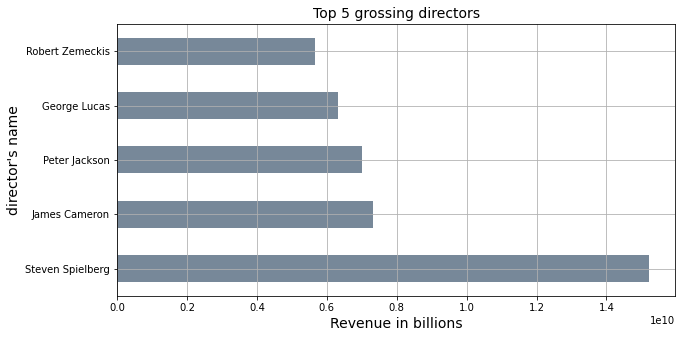

In [146]:
might_work.plot.barh(figsize=(10,5), grid = True, color = 'lightslategray');
plt.title ('Top 5 grossing directors',fontsize = 14)
plt.ylabel("director's name" ,fontsize = 14)
plt.xlabel('Revenue in billions',fontsize = 14);
plt.show();

### Compare the revenue of the highest grossing movies of all time.

In [ ]:
###############################   DONE     ##################################

In [171]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [172]:
df = pd.read_csv('imdb-movies_02.csv') 

In [173]:
df.index = np.arange(1, len(df) + 1)
df.head(2)

popularity      original_title         director  \
1       32.99      Jurassic World  Colin Trevorrow   
2       28.42  Mad Max: Fury Road    George Miller   

                                      genres  \
1  Action|Adventure|Science Fiction|Thriller   
2  Action|Adventure|Science Fiction|Thriller   

                                production_companies  vote_count  \
1  Universal Studios|Amblin Entertainment|Legenda...        5562   
2  Village Roadshow Pictures|Kennedy Miller Produ...        6185   

   vote_average  release_year      revenue_adj  
1          6.50          2015 1,392,445,892.52  
2          7.10          2015   348,161,292.49

In [174]:
 df.groupby('original_title').revenue_adj.sum().nlargest(10)

original_title
Avatar                           2,827,123,750.41
Star Wars                        2,789,712,242.28
Titanic                          2,506,405,735.42
The Exorcist                     2,167,324,901.20
Jaws                             1,907,005,841.92
Star Wars: The Force Awakens     1,902,723,129.80
E.T. the Extra-Terrestrial       1,791,694,309.25
The Net                          1,583,049,536.35
One Hundred and One Dalmatians   1,574,814,739.70
The Avengers                     1,508,100,207.72
Name: revenue_adj, dtype: float64

In [175]:
# changing revenue adj values to a decimal data
df['($) billions'] = '$' + (df['revenue_adj'].astype(float)/1000000000).round(2).astype(str)
df.head(2)

popularity      original_title         director  \
1       32.99      Jurassic World  Colin Trevorrow   
2       28.42  Mad Max: Fury Road    George Miller   

                                      genres  \
1  Action|Adventure|Science Fiction|Thriller   
2  Action|Adventure|Science Fiction|Thriller   

                                production_companies  vote_count  \
1  Universal Studios|Amblin Entertainment|Legenda...        5562   
2  Village Roadshow Pictures|Kennedy Miller Produ...        6185   

   vote_average  release_year      revenue_adj ($) billions  
1          6.50          2015 1,392,445,892.52        $1.39  
2          7.10          2015   348,161,292.49        $0.35

In [176]:
df.groupby('original_title').revenue_adj.sum().nlargest(10)

original_title
Avatar                           2,827,123,750.41
Star Wars                        2,789,712,242.28
Titanic                          2,506,405,735.42
The Exorcist                     2,167,324,901.20
Jaws                             1,907,005,841.92
Star Wars: The Force Awakens     1,902,723,129.80
E.T. the Extra-Terrestrial       1,791,694,309.25
The Net                          1,583,049,536.35
One Hundred and One Dalmatians   1,574,814,739.70
The Avengers                     1,508,100,207.72
Name: revenue_adj, dtype: float64

In [177]:
lets_see = df.groupby('original_title').revenue_adj.sum().nlargest(10)

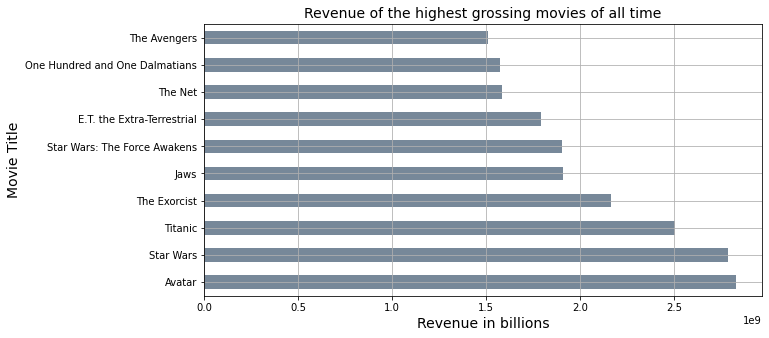

In [178]:
lets_see.plot.barh(figsize=(10,5), grid = True, color = 'lightslategray');
plt.title ('Revenue of the highest grossing movies of all time',fontsize = 14)
plt.ylabel('Movie Title',fontsize = 14);
plt.xlabel('Revenue in billions',fontsize = 14);
plt.show();

<a id="conclusions"></a>
## Conclusions

> Using the cell below, write a brief conclusion of what you have found from the anaylsis of the data. The Cell below will allow you to write plan text instead of code.